<a href="https://colab.research.google.com/github/rzbsys/CNN_MODEL/blob/main/%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**다항 회귀분석을 통한 미래 플라스틱 생산량 예측**
####대전대신고등학교 20529 전민국
####데이터 리터러시 수행평가

증가하는 플라스틱 생산량을 2차 함수를 통해 예측한다.

1.   Pandas 라이브러리를 통한 전처리
2.   Sckit-Learn의 LinearRegression 모델 사용
3.   학습데이터를 통한 학습 진행
4.   Matplot의 pyplot을 통한 시각화 진행

학습데이터는 **[[이곳]](https://www.statista.com/statistics/282732/global-production-of-plastics-since-1950/)**에서 다운받으실 수 있습니다.

**CTRL + ENTER 선택한 셀에 있는 코드 실행**




In [ ]:
#기본 라이브러리 import
import pandas as pd
import numpy as np

Pandas 라이브러리를 활용한 학습 데이터 전처리 

In [ ]:
Data = pd.read_excel('/content/statistic_id282732_global-plastic-production-1950-2019.xlsx', sheet_name=1)
Data = Data.iloc[4:19, 1:3]
Data.columns=['Year', 'Amount']

Y = Data.Amount
Y = np.asarray(Y, dtype=np.float32)
X = Data.Year
X = np.asarray(X, dtype=np.float32)

X = X.reshape((15, 1))

Y = Y.reshape((15, 1))
print(type(X), type(Y))
print(X.shape, Y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(15, 1) (15, 1)


Sckit-Learn의 LinearRegression 모델 사용

In [ ]:
#Sckit-Learne 라이브러리의 LinearRegression 모델 사용
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#X를 2차식으로 변환
X_poly = PolynomialFeatures(degree=2).fit_transform(X)

md = LinearRegression()
md.fit(X_poly, Y)
md.intercept_, md.coef_

(array([357735.03], dtype=float32),
 array([[ 0.0000000e+00, -3.6560638e+02,  9.3414307e-02]], dtype=float32))

Matplot 라이브러리를 활용하여 그래프 생성

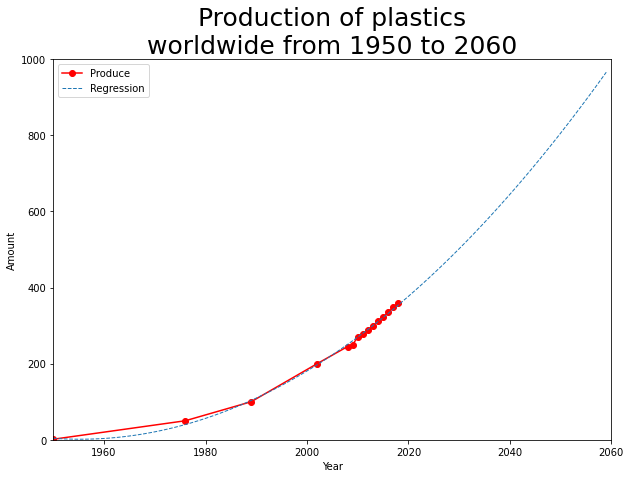

In [ ]:
#2040년까지의 예측 데이터 생성
X_pre = range(1950, 2060)
X_pre = np.asarray(X_pre)
Y_pre = X_pre.reshape((len(X_pre), 1))
Y_pre = PolynomialFeatures(degree=2).fit_transform(Y_pre)
Y_pre = lin_reg.predict(Y_pre)

#그래프 생성
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.plot(X, Y, 'or-', label='Produce')
plt.xlim([1950, 2060])
plt.ylim([0, 1000])
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title("Production of plastics\nworldwide from 1950 to 2060")
plt.plot(X_pre, Y_pre, label='Regression', linewidth=1, linestyle='--')
plt.legend()
plt.rc('axes', titlesize=25)
plt.show()

분석 결과를 바탕으로 2040년과 2060년의 쓰레기 발생량을 예측

In [ ]:
Pre = np.asarray([2040]).reshape(1, 1)
Pre = PolynomialFeatures(degree=2).fit_transform(Pre)
print("2040년 : {}".format(md.predict(Pre)[0][0]))

Pre = np.asarray([2060]).reshape(1, 1)
Pre = PolynomialFeatures(degree=2).fit_transform(Pre)
print("2060년 : {}".format(md.predict(Pre)[0][0]))

2040년 : 650.98583984375
2060년 : 998.831298828125
